In [1]:
# 1. Load data
import pandas as pd

dataset = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")

In [2]:
# 2. Data preparation
# 2.1. Exploratory data analysis
# 2.1.1. Descriptive

# Review data

dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Review dimension

dataset.shape

(1460, 81)

In [4]:
# Review data type

dataset.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [5]:
# Summarize data

dataset.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


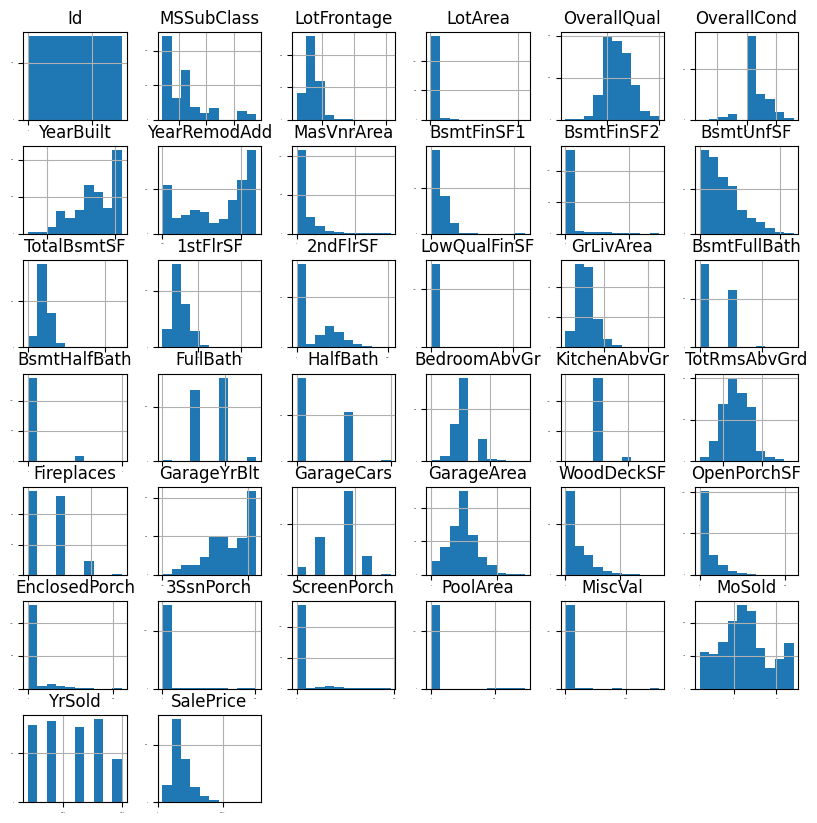

In [6]:
# 2.1.2. Data visualization
# Histogram

from matplotlib import pyplot
dataset.hist(sharex = False, sharey = False, xlabelsize = 1, ylabelsize = 1,\
            figsize = (10,10))
pyplot.show()

In [7]:
# 2.2. Data cleaning
# Handle missing values
# Remove columns that have more than 30% of missing values

missing_fractions = dataset.isnull().mean().sort_values(ascending=False)
drop_list = sorted(list(missing_fractions[missing_fractions > 0.3].index))
dataset.drop(labels = drop_list, axis = 1, inplace = True)
dataset.shape

(1460, 76)

In [8]:
# Fill remaining missing values by 0
dataset = dataset.fillna(0)

In [9]:
# Convert categorical variables to dummy variables
dataset = pd.get_dummies(dataset)

In [10]:
# Define X & Y
Y = dataset["SalePrice"]
X = dataset.loc[:, dataset.columns != "SalePrice"]

In [11]:
# 2.3.Feture selection
# Select 20 important features for model training
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

bestfeatures = SelectKBest(k = 'all', score_func = f_regression)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score'] #naming the dataframe columns
featureScores.nlargest(20,'Score').set_index('Feature')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,Score
Feature,
OverallQual,2436.770591
GrLivArea,1470.585010
GarageCars,1013.705666
GarageArea,926.951287
TotalBsmtSF,880.341282
1stFlrSF,845.524488
ExterQual_TA,774.677019
FullBath,668.430296
BsmtQual_Ex,642.637454


In [12]:
# Define X based on important features

X = dataset[["OverallQual", "GrLivArea", "GarageCars", "GarageArea", "TotalBsmtSF",\
             "1stFlrSF", "ExterQual_TA", "FullBath", "BsmtQual_Ex", "TotRmsAbvGrd",\
             "YearBuilt", "KitchenQual_TA", "YearRemodAdd", "KitchenQual_Ex",\
              "Foundation_PConc", "MasVnrArea", "Fireplaces","ExterQual_Gd",\
             "BsmtQual_TA", "ExterQual_Ex"]]

In [13]:
# 3. Evaluate model
# Split data into training and test set
from sklearn.model_selection import train_test_split

test_size = 0.2
seed = 42
X_train, X_test, Y_train, Y_test =\
train_test_split(X, Y, test_size = test_size, random_state = seed)

In [14]:
# Train model 
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
model.fit(X_train, Y_train)

GradientBoostingRegressor()

In [15]:
# Calculate evaluation metrics - root mean square error
from sklearn.metrics import mean_squared_error
import numpy as np

# RMSE on training data
rmse_train = np.sqrt(mean_squared_error(model.predict(X_train), Y_train))

# RMSE on testing data (unseen data)
rmse_test = np.sqrt(mean_squared_error(model.predict(X_test), Y_test))

print(rmse_train)
print(rmse_test)

18355.631272121547
29422.653660719894


In [16]:
# 4. Predict new data
# Read new data
test_data = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

In [17]:
# Check missing values
test_data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [18]:
# Fill missing values and get dummy
test_data = test_data.fillna(0)
test_data=pd.get_dummies(test_data)

In [19]:
# Define test variables according to traning model

test = test_data[["OverallQual", "GrLivArea", "GarageCars", "GarageArea", "TotalBsmtSF",\
             "1stFlrSF", "ExterQual_TA", "FullBath", "BsmtQual_Ex", "TotRmsAbvGrd",\
             "YearBuilt", "KitchenQual_TA", "YearRemodAdd", "KitchenQual_Ex",\
              "Foundation_PConc", "MasVnrArea", "Fireplaces","ExterQual_Gd",\
             "BsmtQual_TA", "ExterQual_Ex"]]

In [20]:
# Predict Sales prices on new data
predicted_prices = model.predict(test)

print("The predictions are: \n\n", predicted_prices)

The predictions are: 

 [122052.1927857  140833.26228251 163606.89319688 ... 163489.35699512
 121855.03576562 220111.27870896]


In [21]:
# Save prediction to csv file
submission_house_prices = pd.DataFrame({'Id': test_data.Id, 'SalePrice': predicted_prices})
submission_house_prices.to_csv('submission_house_prices.csv', index=False)